<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/Projeto_1_Tecnicas_de_analises_de_dados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Este projeto visa  treinar minhas tecnicas de analises de dados e busca responder algumas questoões ficticias , os dados desse projeto foi retirado dos site** : http://dados.prefeitura.sp.gov.br/sv/dataset/cadastro-dos-equipamentos-municipais-de-esporte/resource/b5c387c8-a7cf-4752-8c6e-ddefb61a02cb?view_id=01dce4ca-bd8f-4337-8c29-d1ea2eefe570


In [154]:
#Aqui importei as Bibliotecas que vamos usar para an  alisar os dados
import pandas as pd
import seaborn as sns


In [155]:
#Como a Planilha tem mais de uma sheet e tem sheets com informações importante , aloquei em variaveis com os daods que cada um contem
#dados este que serão utilizado neste modelo
variavel = pd.read_excel("/content/deinfoesesporte2014.xls",sheet_name = "Variáveis")
local = pd.read_excel("/content/deinfoesesporte2014.xls",sheet_name = "Esporte_2014")
categoria = pd.read_excel("/content/deinfoesesporte2014.xls",sheet_name = "Categorias")

In [156]:
#Aqui faço a primeira visualização dos dados conheço um pouco mais o que quer dizer cada coluna quie esta no dados
display(categoria)

,Variável,Código,Categorias,Descrição
0,ES_TIPO,1,Centro Esportivo/Centro Educacional e Esportiv...,Número de Centros Educacionais e Esportivos
1,ES_TIPO,2,Centro Esportivo/Centro de Esporte e Lazer - C...,Número de Centros de Esporte e Lazer - CEL
2,ES_TIPO,3,Centro Esportivo/Balneário,Número de Balneários
3,ES_TIPO,4,Centro Esportivo/Mini-Balneário,Número de Mini-Balneários
4,ES_TIPO,5,Centro Olímpico,Centro Olímpico
5,ES_TIPO,6,Modelódromo,Número de Modelódromos
6,ES_TIPO,7,Autódromo,Autódromo
7,ES_TIPO,8,Clube Desportivo com Estádio,Número de Clubes Desportivos com Estadios
8,ES_TIPO,9,Clube Desportivo,Número de Clubes Desportivos
9,ES_TIPO,10,Clube Desportivo com Ginásio,Número de Clubes Desportivos com Ginásios


In [157]:
#Visualização de outra sheet
variavel.head()

,Arquivo,Variável,Nome da variável,Descrição da variável,Fonte,Tipo,Tamanho,Sigilo
0,DEINFO_ES_ESPORTE_2014,ID,Identificador,Número de identificação do estabelecimento geo...,SMDU/Deinfo,TEXTO,3,0
1,DEINFO_ES_ESPORTE_2014,LONG,Longitude,Longitude da localização do estabelecimento no...,SMDU/Deinfo,TEXTO,9,0
2,DEINFO_ES_ESPORTE_2014,LAT,Latitude,Latitude da localização do estabelecimento no ...,SMDU/Deinfo,TEXTO,9,0
3,DEINFO_ES_ESPORTE_2014,SETCENS,Setor censitário,Setor censitário conforme IBGE,IBGE,TEXTO,7,0
4,DEINFO_ES_ESPORTE_2014,AREAP,Área de ponderação,Área de ponderação (agrupamento de setores cen...,IBGE,TEXTO,5,0


In [158]:
#Verificando a entrada de dados nulos
local.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          625 non-null    int64 
 1   LONG        625 non-null    int64 
 2   LAT         625 non-null    int64 
 3   SETCENS     625 non-null    int64 
 4   AREAP       625 non-null    int64 
 5   CODDIST     625 non-null    int64 
 6   DISTRITO    625 non-null    object
 7   CODSUBPREF  625 non-null    int64 
 8   SUBPREF     625 non-null    object
 9   REGIAO5     625 non-null    object
 10  REGIAO8     625 non-null    object
 11  NOME        625 non-null    object
 12  ENDERECO    625 non-null    object
 13  BAIRRO      54 non-null     object
 14  CEP         593 non-null    object
 15  ES_TIPO     625 non-null    int64 
 16  ES_DEPADM   625 non-null    int64 
dtypes: int64(9), object(8)
memory usage: 83.1+ KB


In [159]:
# Nesta area comecei a entender um pouco mais sobre o data-set
# Fiz a verifcação de colunas
local.head()

,ID,LONG,LAT,SETCENS,AREAP,CODDIST,DISTRITO,CODSUBPREF,SUBPREF,REGIAO5,REGIAO8,NOME,ENDERECO,BAIRRO,CEP,ES_TIPO,ES_DEPADM
0,1,-46693149,-23483054,355030829000031,3550308005118,29,FREGUESIA DO O,3,FREGUESIA-BRASILANDIA,Norte,Norte 1,C.E. FREGUESIA DO Ó / C.E.E. AURÉLIO DE CAMPOS,"Rua Jacutiba, 167",NaN,02832-240,1,1
1,2,-46697050,-23475713,355030829000116,3550308005119,29,FREGUESIA DO O,3,FREGUESIA-BRASILANDIA,Norte,Norte 1,C.E. VILA BRASILÂNDIA / C.E.E. OSWALDO BRANDÃO,"Rua Moshihisa Murata, 120",NaN,02806-160,1,1
2,3,-46594450,-23594850,355030834000078,3550308005084,33,IPIRANGA,13,IPIRANGA,Sul,Sul 1,C.E. VILA CARIOCA,"Rua Clemente, 100",NaN,04216-060,1,1
3,4,-46586210,-23513369,355030889000061,3550308005033,91,VILA MARIA,7,VILA MARIA-VILA GUILHERME,Norte,Norte 2,C.E. VILA GUILHERME / GINÁSIO ESPORTIVO DARCY ...,"Av. Guilherme, 1819",NaN,02053-003,1,1
4,5,-46651378,-23523016,355030869000043,3550308005027,70,SANTA CECILIA,9,SE,Centro,Centro,CE BARRA FUNDA/CEE RAUL TABAJARA,"Rua. Anhanguera, 484",NaN,01135-000,1,1


In [160]:
local.columns

Index(['ID', 'LONG', 'LAT', 'SETCENS', 'AREAP', 'CODDIST', 'DISTRITO',
       'CODSUBPREF', 'SUBPREF', 'REGIAO5', 'REGIAO8', 'NOME', 'ENDERECO',
       'BAIRRO', 'CEP', 'ES_TIPO', 'ES_DEPADM'],
      dtype='object')

In [161]:
local = local.drop(['LONG','LAT','SETCENS','AREAP',"BAIRRO"], axis= 1)

In [162]:
local.head()

,ID,CODDIST,DISTRITO,CODSUBPREF,SUBPREF,REGIAO5,REGIAO8,NOME,ENDERECO,CEP,ES_TIPO,ES_DEPADM
0,1,29,FREGUESIA DO O,3,FREGUESIA-BRASILANDIA,Norte,Norte 1,C.E. FREGUESIA DO Ó / C.E.E. AURÉLIO DE CAMPOS,"Rua Jacutiba, 167",02832-240,1,1
1,2,29,FREGUESIA DO O,3,FREGUESIA-BRASILANDIA,Norte,Norte 1,C.E. VILA BRASILÂNDIA / C.E.E. OSWALDO BRANDÃO,"Rua Moshihisa Murata, 120",02806-160,1,1
2,3,33,IPIRANGA,13,IPIRANGA,Sul,Sul 1,C.E. VILA CARIOCA,"Rua Clemente, 100",04216-060,1,1
3,4,91,VILA MARIA,7,VILA MARIA-VILA GUILHERME,Norte,Norte 2,C.E. VILA GUILHERME / GINÁSIO ESPORTIVO DARCY ...,"Av. Guilherme, 1819",02053-003,1,1
4,5,70,SANTA CECILIA,9,SE,Centro,Centro,CE BARRA FUNDA/CEE RAUL TABAJARA,"Rua. Anhanguera, 484",01135-000,1,1


In [163]:
local.columns

Index(['ID', 'CODDIST', 'DISTRITO', 'CODSUBPREF', 'SUBPREF', 'REGIAO5',
       'REGIAO8', 'NOME', 'ENDERECO', 'CEP', 'ES_TIPO', 'ES_DEPADM'],
      dtype='object')

In [164]:
local = local.rename(columns={"REGIAO5":"REGIAO_1","REGIAO8":"REGIAO_2",})

In [165]:
local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          625 non-null    int64 
 1   CODDIST     625 non-null    int64 
 2   DISTRITO    625 non-null    object
 3   CODSUBPREF  625 non-null    int64 
 4   SUBPREF     625 non-null    object
 5   REGIAO_1    625 non-null    object
 6   REGIAO_2    625 non-null    object
 7   NOME        625 non-null    object
 8   ENDERECO    625 non-null    object
 9   CEP         593 non-null    object
 10  ES_TIPO     625 non-null    int64 
 11  ES_DEPADM   625 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 58.7+ KB


In [166]:
local

,ID,CODDIST,DISTRITO,CODSUBPREF,SUBPREF,REGIAO_1,REGIAO_2,NOME,ENDERECO,CEP,ES_TIPO,ES_DEPADM
0,1,29,FREGUESIA DO O,3,FREGUESIA-BRASILANDIA,Norte,Norte 1,C.E. FREGUESIA DO Ó / C.E.E. AURÉLIO DE CAMPOS,"Rua Jacutiba, 167",02832-240,1,1
1,2,29,FREGUESIA DO O,3,FREGUESIA-BRASILANDIA,Norte,Norte 1,C.E. VILA BRASILÂNDIA / C.E.E. OSWALDO BRANDÃO,"Rua Moshihisa Murata, 120",02806-160,1,1
2,3,33,IPIRANGA,13,IPIRANGA,Sul,Sul 1,C.E. VILA CARIOCA,"Rua Clemente, 100",04216-060,1,1
3,4,91,VILA MARIA,7,VILA MARIA-VILA GUILHERME,Norte,Norte 2,C.E. VILA GUILHERME / GINÁSIO ESPORTIVO DARCY ...,"Av. Guilherme, 1819",02053-003,1,1
4,5,70,SANTA CECILIA,9,SE,Centro,Centro,CE BARRA FUNDA/CEE RAUL TABAJARA,"Rua. Anhanguera, 484",01135-000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
620,622,86,VILA CURUCA,24,ITAIM PAULISTA,Leste,Leste 2,CEU Vila Curuçá,"Av Marechal Tito, 3.400 -V. Curuca",NaN,18,1
621,623,35,ITAIM PAULISTA,24,ITAIM PAULISTA,Leste,Leste 2,CEU Parque Veredas,"R Daniel Pedro Muller, s/n- Camargo Velho",NaN,18,1
622,624,43,JARDIM HELENA,23,SAO MIGUEL,Leste,Leste 2,CEU Três Pontes,"Endereþo: R Capach¾s, s/n",08191-330,18,1
623,625,36,ITAQUERA,27,ITAQUERA,Leste,Leste 2,Arena Corinthians,"Avenida Miguel Ignácio Curi, 111",08295-005,8,4


In [167]:
local =  local.query("ES_TIPO == 1")
local

,ID,CODDIST,DISTRITO,CODSUBPREF,SUBPREF,REGIAO_1,REGIAO_2,NOME,ENDERECO,CEP,ES_TIPO,ES_DEPADM
0,1,29,FREGUESIA DO O,3,FREGUESIA-BRASILANDIA,Norte,Norte 1,C.E. FREGUESIA DO Ó / C.E.E. AURÉLIO DE CAMPOS,"Rua Jacutiba, 167",02832-240,1,1
1,2,29,FREGUESIA DO O,3,FREGUESIA-BRASILANDIA,Norte,Norte 1,C.E. VILA BRASILÂNDIA / C.E.E. OSWALDO BRANDÃO,"Rua Moshihisa Murata, 120",02806-160,1,1
2,3,33,IPIRANGA,13,IPIRANGA,Sul,Sul 1,C.E. VILA CARIOCA,"Rua Clemente, 100",04216-060,1,1
3,4,91,VILA MARIA,7,VILA MARIA-VILA GUILHERME,Norte,Norte 2,C.E. VILA GUILHERME / GINÁSIO ESPORTIVO DARCY ...,"Av. Guilherme, 1819",02053-003,1,1
4,5,70,SANTA CECILIA,9,SE,Centro,Centro,CE BARRA FUNDA/CEE RAUL TABAJARA,"Rua. Anhanguera, 484",01135-000,1,1
5,6,12,BUTANTA,10,BUTANTA,Oeste,Oeste,CE BUTANTÃ/CEE SOLANGE NUNES BIBA,"Rua Ernani da G. Correia, 367",05539-040,1,1
6,7,14,CAMBUCI,9,SE,Centro,Centro,CE CAMBUÇI/CEE RUBENS PACCE LORDELLO,"Av. Lins de Vasconcelos, 804",01535-000,1,1
7,8,86,VILA CURUCA,24,ITAIM PAULISTA,Leste,Leste 2,CE CURUÇA/CEE JOSÉ ERMIRIO DE MORAES,"Rua Grapira, 537",08030-190,1,1
8,9,46,JOSE BONIFACIO,27,ITAQUERA,Leste,Leste 2,CE GUAIANAZES/CEE GERDY GOMES,"Rua Profª Lucila Cerqueira, 194",08420-690,1,1
9,10,53,MOEMA,12,VILA MARIANA,Sul,Sul 1,CE IBIRAPUERA/CEE MANÉ GARRINCHA,"Rua Pedro de Toledo, 1651",04039-034,1,1


In [171]:
esporte = local.groupby(["REGIAO_1"])["ES_TIPO"].agg("count").reset_index()
esporte

,REGIAO_1,ES_TIPO
0,Centro,2
1,Leste,8
2,Norte,6
3,Oeste,2
4,Sul,5


<Axes: xlabel='REGIAO_1', ylabel='ES_TIPO'>

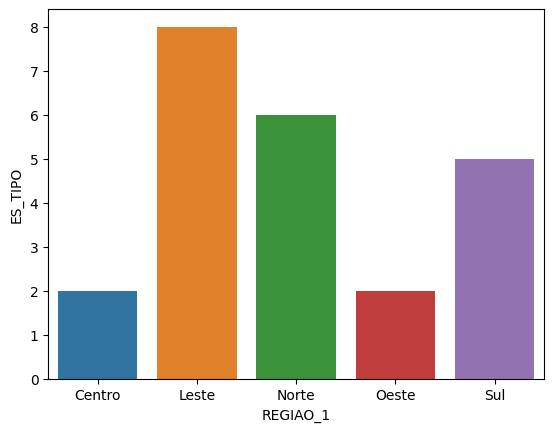

In [177]:
sns.barplot(data= esporte , x = "REGIAO_1",y="ES_TIPO")